# Spectre du corps noir
https://fr.wikipedia.org/wiki/Loi_de_Planck

RGB color code for star color depending on temperature : https://arxiv.org/pdf/2101.06254.pdf and https://zenodo.org/record/4090873#.YGI29OY6-gQ

Les premiers codes fonctionnent mais la couleur affichée pour les petites longueurs d'onde est le violet. Cependant, cette couleur devrait être du bleu profond.
En effet le violet est la combinaison du bleu et du rouge.

https://youtu.be/9udYi7exojk

In [1]:
%pylab inline

from Spectrum import wavelength_to_rgb, planck, wavelength_max, star_color_rgb, star_image

def mysavefig(filename):
    plt.tight_layout()
    plt.savefig(filename, bbox_inches="tight", dpi=200)

Populating the interactive namespace from numpy and matplotlib


([], <a list of 0 Text major ticklabel objects>)

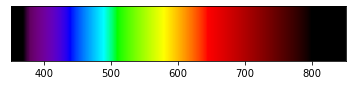

In [2]:
fig = plt.figure(figsize=(6,1))
wavelength = np.linspace(300e-9, 850e-9, 1000)
for wl in wavelength:
    color = wavelength_to_rgb(wl*1e9)
    plt.plot([wl*1e9, wl*1e9], [0,1], color=color)
plt.xlim(350,850)
plt.ylim(0,1)
plt.yticks([])

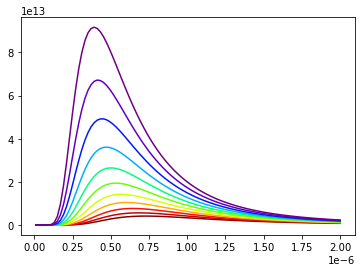

In [101]:
wavelength = np.linspace(10e-9, 2000e-9, 100)

temperatures = np.logspace(3.6, 3.87, 11)

for temperature in temperatures:
    color = wavelength_to_rgb(wavelength_max(temperature)*1e9)
    plt.plot(wavelength, planck(wavelength, temperature), color=color)

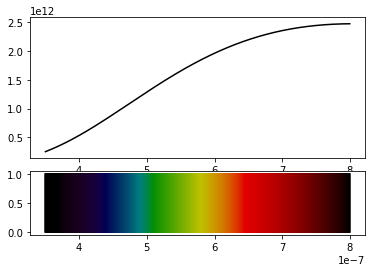

In [215]:
temperature = 3600
n = 1000

fig = plt.figure(figsize=(6,4))
sps = (3,1)
ax1 = plt.subplot2grid(sps, (0,0), rowspan=2)
ax2 = plt.subplot2grid(sps, (2,0), rowspan=1)

wavelength = np.linspace(350e-9, 800e-9, n)
#wavelength = np.linspace(10e-9, 2000e-9, n)
wavelengthmax = wavelength_max(temperature)
if wavelengthmax > 750e-9:
    norm = planck(750e-9, temperature)
elif wavelengthmax < 380e-9:
    norm = planck(380e-9, temperature)
else:
    norm = planck(wavelengthmax, temperature)
alphas     = planck(wavelength, temperature) / planck(wavelength_max(temperature), temperature)
alphas     = planck(wavelength, temperature) / planck(720e-9, temperature).max()
alphas     = planck(wavelength, temperature) / norm
for wl, alpha in zip(wavelength, alphas):
    color = wavelength_to_rgb(wl*1e9)
    new_color = (color[0]*alpha, color[1]*alpha, color[2]*alpha)
    ax2.plot([wl, wl], [0,1], color=new_color)
color = wavelength_to_rgb(wavelength_max(temperature)*1e9)
ax1.plot(wavelength, planck(wavelength, temperature), color=color)

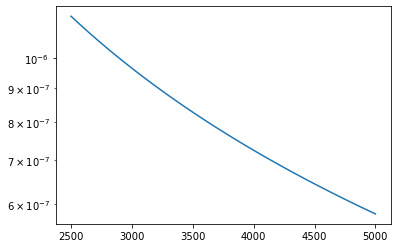

In [22]:
temps = np.linspace(2500, 5000)
plt.semilogy(temps, wavelength_max(temps))


/Users/remimetzdorff/Documents/Github/python/fitting/fitting.py:230: RuntimeWarning: invalid value encountered in double_scalars
  return c * (x-x0) ** a


[]

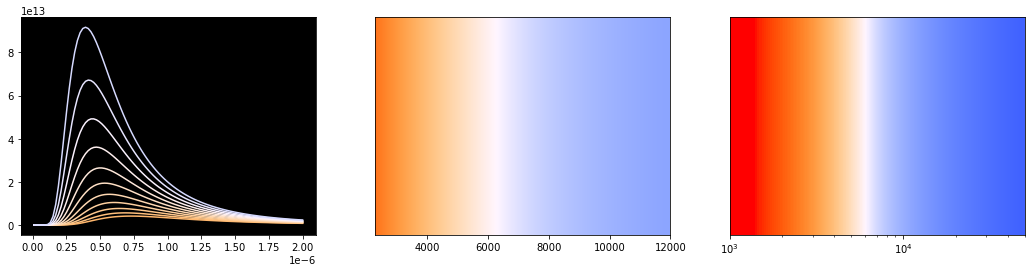

In [103]:
# Star color vs temperature

fig = plt.figure(figsize=(18,4))
sps = (1,3)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))
ax3 = plt.subplot2grid(sps, (0,2))

temperatures = np.logspace(3.6, 3.87, 11)
wavelength = np.linspace(10e-9, 2000e-9, 100)
for i, temperature in enumerate(temperatures[:48]):
    color = star_color_rgb(temperature)
    ax1.plot(wavelength, planck(wavelength, temperature), color=color)
ax1.set_facecolor("k")

temperatures = np.linspace(2300,12000, 1001)
for temperature in temperatures:
    color = star_color_rgb(temperature)
    ax2.plot([temperature, temperature], [0,1], color=color, lw=10)
ax2.set_xlim(temperatures[0],temperatures[-1])
ax2.set_ylim(0,1)
ax2.set_yticks([])

temperatures = np.linspace(1000,50000, 1001)
for temperature in temperatures:
    color = star_color_rgb(temperature)
    ax3.semilogx([temperature, temperature], [0,1], color=color, lw=10)
ax3.set_xlim(temperatures[0],temperatures[-1])
ax3.set_ylim(0,1)
ax3.set_yticks([])

# Realistic star image
https://arxiv.org/pdf/2101.06254.pdf

https://iopscience.iop.org/article/10.3847/2515-5172/aaffdf/pdf

https://www.google.com/url?sa=i&url=https%3A%2F%2Fspace.stackexchange.com%2Fquestions%2F16622%2Fneed-help-simulating-solar-limb-darkening&psig=AOvVaw3YtgPwLeThuh92aIr_gm_t&ust=1617256682270000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCJiJj-Ls2e8CFQAAAAAdAAAAABAP

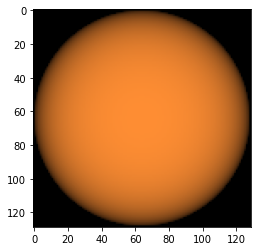

In [2]:
im = star_image(3000)
#im.save("test.png")
#im.show()

imgplot = plt.imshow(im)

# Bilan

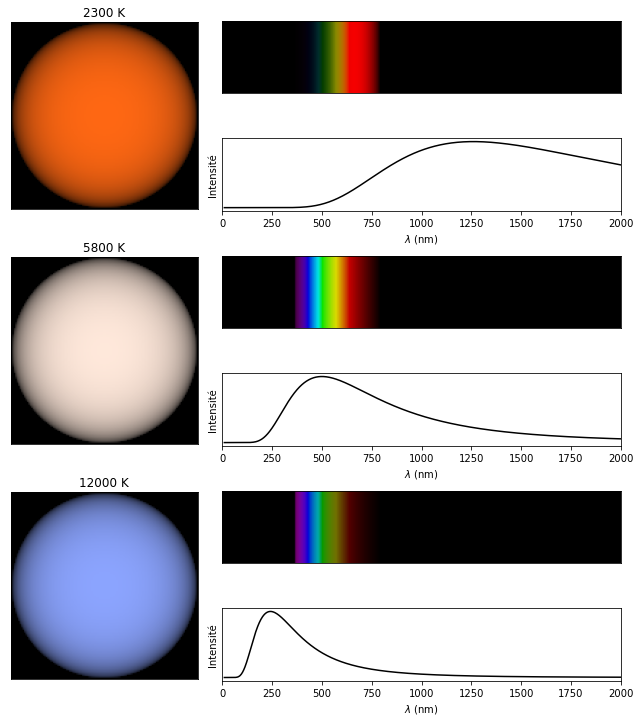

In [3]:
temperatures = [2300, 5800, 12000]
scales = [7e10, 3e13, 6e14]
n = len(temperatures)
fig = plt.figure(figsize=(3*n, 10))
sps = (2*n, 3)
for i, temperature in enumerate(temperatures):
    ax1 = plt.subplot2grid(sps, (2*i, 0), rowspan=2)
    ax3 = plt.subplot2grid(sps, (2*i, 1), rowspan=1, colspan=2)
    ax2 = plt.subplot2grid(sps, (2*i+1, 1), colspan=2)
    
    im = star_image(temperature)
    ax1.set_title(str(temperature)+" K")
    ax1.imshow(im)
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    wavelengths = np.linspace(10e-9, 2000e-9, 1000)
    ax2.plot(wavelengths*1e9, planck(wavelengths, temperature), color="k")
    ax2.set_xlim(0,2000)
    ax2.set_xlabel(r"$\lambda$ (nm)")
    ax2.set_ylabel(("Intensité"))
    #ax2.set_xticks([])
    ax2.set_yticks([])
    
    alphas     = planck(wavelengths, temperature) / scales[i]#planck(wavelength_max(temperature), temperature)
    for wl, alpha in zip(wavelengths, alphas):
        color = wavelength_to_rgb(wl*1e9)
        new_color = (color[0]*alpha, color[1]*alpha, color[2]*alpha)
        ax3.plot([wl*1e9, wl*1e9], [0,10], color=new_color, lw=5)
        #y = planck(wavelengths, temperature)
        #ax2.plot([wl*1e9, wl*1e9], [y,y], color=new_color)
    ax3.set_xlim(0,2000)
    ax3.set_ylim(0,10)
    ax3.set_xticks([])
    ax3.set_yticks([])
plt.tight_layout()
plt.savefig("test.png", bbox_inches="tight", dpi=200)

/Users/remimetzdorff/Documents/Github/python/fitting/fitting.py:230: RuntimeWarning: invalid value encountered in double_scalars
  return c * (x-x0) ** a


(1, 0, 0)

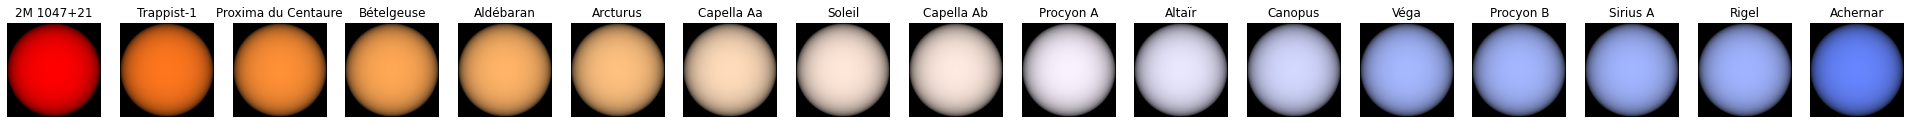

In [2]:
# Température de quelques étoiles
# https://fr.wikipedia.org/wiki/Liste_des_%C3%A9toiles_les_plus_brillantes
# HUGE star database: http://vizier.u-strasbg.fr/viz-bin/VizieR-4

sun              = {"name_fr":"Soleil", "T":5770, "size":1}
sirius_a         = {"name_fr":"Sirius A", "T":9900, "size":1.711}
canopus          = {"name_fr":"Canopus", "T":7500, "size":71.4}
arcturus         = {"name_fr":"Arcturus", "T":4300, "size":25.4}
proxima_centauri = {"name_fr":"Proxima du Centaure", "T":3050, "size":0.1542}
vega             = {"name_fr":"Véga", "T":9600, "size":2.5}
rigel            = {"name_fr":"Rigel", "T":10000, "size":78.9}
procyon_a        = {"name_fr":"Procyon A", "T":6550, "size":2.048}
procyon_b        = {"name_fr":"Procyon B", "T":9700, "size":0.02}
achernar         = {"name_fr":"Achernar", "T":20000, "size":10}
betelgeuse       = {"name_fr":"Bételgeuse", "T":3600, "size":1000}
capella_aa       = {"name_fr":"Capella Aa", "T":5270, "size":10.2}
capella_ab       = {"name_fr":"Capella Ab", "T":5900, "size":8.5}
altair           = {"name_fr":"Altaïr", "T":6900, "size":2}
aldebaran        = {"name_fr":"Aldébaran", "T":3910, "size":45.1}
trappist1        = {"name_fr":"Trappist-1", "T":2550, "size":0.114}
massi            = {"name_fr":"2M 1047+21", "T":900}
tau_ceti         = {"name_fr":"Tau Ceti", "T":5344, "size":0.816}

stars = [sun, sirius_a, canopus, arcturus, proxima_centauri, vega, rigel,
         procyon_a, procyon_b, achernar, betelgeuse, capella_aa, capella_ab,
         altair, aldebaran, trappist1, massi]

fig = plt.figure(figsize=(2*len(stars), 2))
sps = (1, len(stars))

for i, star in enumerate(sorted(stars, key = lambda i: i['T'])):
    ax = plt.subplot2grid(sps, (0,i))
    plt.axis('off')
    im = star_image(star["T"])
    ax.imshow(im)
    ax.set_title(star["name_fr"])
star_color_rgb(1000)

# Hertzprung Russel

In [93]:
with open("asu.tsv") as file:
    content = file.readlines()

temperature, luminosity = [], []
for line in content[51:-1]:
    line = line.strip("\n")
    line = line.replace("\t", "")
    line = line.split(";")
    temperature.append(float(line[6]))
    luminosity.append(float(line[7]))
temperature = 10**np.array(temperature)
luminosity = 10**np.array(luminosity)
color = [star_color_rgb(t) for t in temperature]
len(color)

/Users/remimetzdorff/Documents/Github/python/fitting/fitting.py:230: RuntimeWarning: invalid value encountered in double_scalars
  return c * (x-x0) ** a


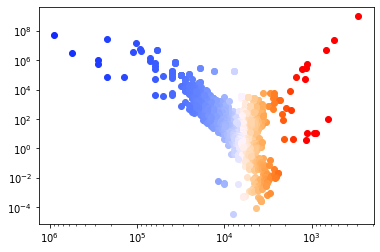

In [96]:
for t, l, c in zip(temperature, luminosity, color):
    plt.plot([t], [l], "o", color=c)
plt.loglog([t], [l], "o", color=c)
plt.gca().invert_xaxis()

# Elements spectra

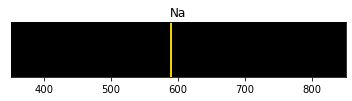

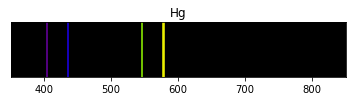

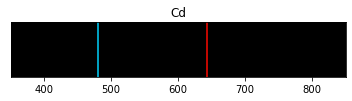

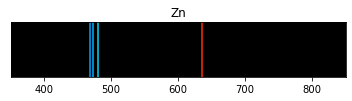

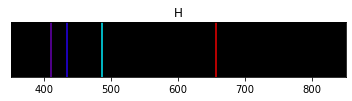

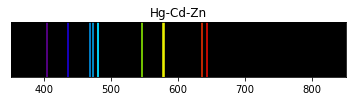

In [53]:
# Simpler version with sextant "database"

lines_Na = [589.00, 589.59]
lines_Hg = [365.02, 404.66, 435.83, 546.07, 576.96, 579.07]
lines_Cd = [479.99, 643.85]
lines_Zn = [468.01, 472.22, 481.05, 636.23]
lines_H  = [410.17, 434.05, 486.13, 656.28]

def plot_spectrum(lines, emmission=True, title=None):
    fig = plt.figure(figsize=(6,1))
    ax = plt.subplot2grid((1,1), (0,0))
    if title is not None:
        ax.set_title(title)
    if emmission:
        ax.set_facecolor("k")
        for wl in lines:
            color = wavelength_to_rgb(wl)
            plt.plot([wl, wl], [0,1], color=color)
    else:
        wavelength = np.linspace(350, 850, 1001)
        for wl in wavelength:
            color = wavelength_to_rgb(wl)
            plt.plot([wl, wl], [0,1], color=color)
        for wl in lines:
            plt.plot([wl, wl], [0,1], color="k")
    plt.xlim(350,850)
    plt.ylim(0,1)
    plt.yticks([])

plot_spectrum(lines_Na, title="Na")
plot_spectrum(lines_Hg, title="Hg")
plot_spectrum(lines_Cd, title="Cd")
plot_spectrum(lines_Zn, title="Zn")
plot_spectrum(lines_H, title="H")

plot_spectrum(lines_Hg+lines_Cd+lines_Zn, title="Hg-Cd-Zn")

# Wavelength to RGB converter based on CIE XYZ NOT WORKING
https://fr.wikipedia.org/wiki/CIE_XYZ

https://fr.wikiversity.org/wiki/Colorim%C3%A9trie/CIE_XYZ_1931

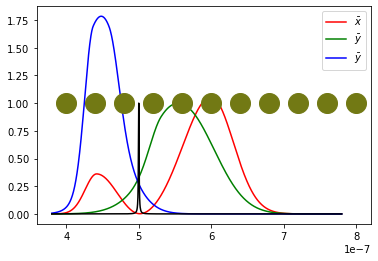

In [37]:
from scipy import integrate

def lorentzian(x,scale,x0,gamma):
    return scale / (1 + (2*(x-x0)/gamma)**2)

def gaussian(x, scale, mu, sigma):
    return scale * np.exp( -(x - mu)**2 / (2 * sigma ** 2) )

def g(x, scale, mu, sigma1, sigma2):
    if hasattr(x, "__iter__"):
        xs = list(x)
        yinf, ysup = [], []
        for val in xs:
            if val < mu:
                yinf.append(gaussian(val, scale, mu, sigma1))
            else:
                ysup.append(gaussian(val, scale, mu, sigma2))
        y = np.array(yinf+ysup)
    else:
        if x < mu:
            y = gaussian(x, scale, mu, sigma1)
        else:
            y = gaussian(x, scale, mu, sigma2)
    return y

def xbar(wavelength):
    """wavelength in meters"""
    wl = wavelength * 1e10
    val1 = g(wl, 1.056, 5998, 379, 310)
    val2 = g(wl, 0.362, 4420, 160, 267)
    val3 = g(wl, -0.065, 5011, 204, 262)
    return val1 + val2 + val3

def ybar(wavelength):
    """wavelength in meters"""
    wl = wavelength * 1e10
    val1 = g(wl, 0.821, 5688, 469, 405)
    val2 = g(wl, 0.286, 5309, 163, 311)
    return val1 + val2

def zbar(wavelength):
    """wavelength in meters"""
    wl = wavelength * 1e10
    val1 = g(wl, 1.217, 4370, 118, 360)
    val2 = g(wl, 0.681, 4590, 260, 138)
    return val1 + val2

def wavelength_to_xyz(wavelength):
    scale = 1
    def func_x(x):
        dsp = lorentzian(x, scale, wavelength, 1e-9)
        dsp = planck(x,2000)
        return dsp * xbar(x)
    def func_y(x):
        dsp = lorentzian(x, scale, wavelength, 1e-9)
        dsp = planck(x,2000)
        return dsp * ybar(x)
    def func_z(x):
        dsp = lorentzian(x, scale, wavelength, 1e-9)
        dsp = planck(x,2000)
        return dsp * zbar(x)
    X,_ = integrate.quad(func_x, 380e-9, 780e-9)
    Y,_ = integrate.quad(func_y, 380e-9, 780e-9)
    Z,_ = integrate.quad(func_z, 380e-9, 780e-9)
    norm = X + Y + Z
    return X/norm, Y/norm, Z/norm

def wavelength_to_xyz_to_rgb(wavelength):
    x,y,z = wavelength_to_xyz(wavelength)
    X,Y,Z = wavelength_to_xyz(wavelength)
    r = 0.41847 * x - 0.15866 * y - 0.082835 * z
    g = -0.091169 * x + 0.25243 * y + 0.015708 * z
    b = 0.00092090 * x - 0.0025498 * y + 0.17860 * z
    
    R =  3.2404542*X - 1.5371385*Y - 0.4985314*Z
    G = -0.9692660*X + 1.8760108*Y + 0.0415560*Z
    B =  0.0556434*X - 0.2040259*Y + 1.0572252*Z
    
    R = .73456 * X + .26533 * Y + .00000 * Z
    G = .27376 * X + .71741 * Y + .00883 * Z
    B = .16658 * X + .00886 * Y + .82456 * Z
    
    R = .67 * X + .21 * Y + .14 * Z
    G = .33 * X + .71 * Y + .08 * Z
    B = .00 * X + .08 * Y + .78 * Z
    
    return R, G, B

wavelength = np.linspace(380e-9, 780e-9, 1001)
plt.plot(wavelength, xbar(wavelength), color="red", label=r"$\bar{x}$")
plt.plot(wavelength, ybar(wavelength), color="green", label=r"$\bar{y}$")
plt.plot(wavelength, zbar(wavelength), color="blue", label=r"$\bar{y}$")
plt.plot(wavelength, lorentzian(wavelength, 1, 500e-9, 1e-9), "k")
plt.legend()

wavelength_to_xyz(600e-9)

for wl in np.linspace(400e-9, 800e-9, 11):
    plt.plot([wl], [1], "o", color=wavelength_to_xyz_to_rgb(wl), ms=20)


# Test

([], <a list of 0 Text major ticklabel objects>)

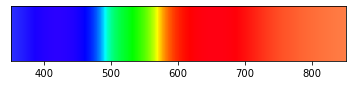

In [54]:
# https://scipython.com/blog/converting-a-spectrum-to-a-colour/

from colour_system import cs_hdtv
cs = cs_hdtv

wl = np.arange(380., 781., 5)
spec = lorentzian(wl, 1, 400, 1)
cs.spec_to_rgb(spec)

fig = plt.figure(figsize=(6,1))
wavelength = np.linspace(200e-9, 850e-9, 1000)
for wl in wavelength:
    lam = np.arange(380., 781., 5)
    spec = lorentzian(lam, 100, wl*1e9, 10)
    color = cs.spec_to_rgb(spec)
    plt.plot([wl*1e9, wl*1e9], [0,1], color=color)
plt.xlim(350,850)
plt.ylim(0,1)
plt.yticks([])

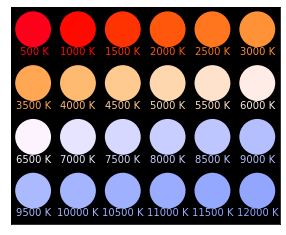

In [61]:
import numpy as np
from scipy.constants import h, c, k
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from colour_system import cs_hdtv
cs = cs_hdtv

def planck(lam, T):
    """ Returns the spectral radiance of a black body at temperature T.

    Returns the spectral radiance, B(lam, T), in W.sr-1.m-2 of a black body
    at temperature T (in K) at a wavelength lam (in nm), using Planck's law.

    """

    lam_m = lam / 1.e9
    fac = h*c/lam_m/k/T
    B = 2*h*c**2/lam_m**5 / (np.exp(fac) - 1)
    return B

fig, ax = plt.subplots()

# The grid of visible wavelengths corresponding to the grid of colour-matching
# functions used by the ColourSystem instance.
lam = np.arange(380., 781., 5)

for i in range(24):
    # T = 500 to 12000 K
    T = 500*i + 500

    # Calculate the black body spectrum and the HTML hex RGB colour string
    # it looks like
    spec = planck(lam, T)
    html_rgb = cs.spec_to_rgb(spec, out_fmt='html')

    # Place and label a circle with the colour of a black body at temperature T
    x, y = i % 6, -(i // 6)
    circle = Circle(xy=(x, y*1.2), radius=0.4, fc=html_rgb)
    ax.add_patch(circle)
    ax.annotate('{:4d} K'.format(T), xy=(x, y*1.2-0.5), va='center',
                ha='center', color=html_rgb)

# Set the limits and background colour; remove the ticks
ax.set_xlim(-0.5,5.5)
ax.set_ylim(-4.35, 0.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('k')
# Make sure our circles are circular!
ax.set_aspect("equal")
plt.show()

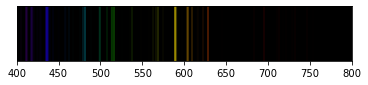

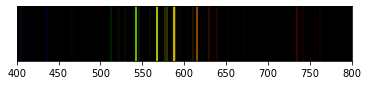

In [12]:
# Elements spectra
# Attempt with nist database https://physics.nist.gov/PhysRefData/ASD/lines_form.html but it's a pain

def read_atomic_lines(filename):
    def str_to_float(s):
        if len(s)>0:
            val = float(s)
        else:
            val = 0
        return val

    with open(filename) as file:
        content = file.readlines()

    wl, strength = [], []
    for i, line in enumerate(content):
        if i>0:
            vals = line.split("\t")
            obs_wl, ritz_wl, S = str(vals[2]).strip("\""), vals[4].strip("\""), vals[8].strip("\"")
            obs_wl = str_to_float(obs_wl)
            ritz_wl = str_to_float(ritz_wl)
            S = str_to_float(S)
            if ritz_wl == 0:
                wl.append(obs_wl)
            else:
                wl.append(ritz_wl)
            strength.append(S)
    wl, strength = np.array(wl), np.array(strength)
    
    return wl, strength

def plot_spectrum(filename):
    wl, strength = read_atomic_lines(filename)

    vis_wl, vis_strength = [], []
    for w, s in zip(wl, strength):
        if w > 400 and w < 800:
            vis_wl.append(w)
            vis_strength.append(s)
    fig = plt.figure(figsize=(6,1))
    ax = plt.subplot2grid((1,1), (0,0))
    for wl, strength in zip(vis_wl, vis_strength):
        color = wavelength_to_rgb(wl)
        if strength>1:
            strength=1
        plt.plot([wl, wl], [0,1], color=color, alpha=strength)
    plt.xlim(400,800)
    plt.ylim(0,1)
    plt.yticks([])
    ax.set_facecolor("k")
    return

plot_spectrum("lines_Na.txt")
plot_spectrum("lines_Hg.txt")

# Figures pour le cours

In [3]:
%pylab inline

from Spectrum import wavelength_to_rgb, planck, wavelength_max, star_color_rgb, star_image

def mysavefig(filename, dpi=200):
    plt.tight_layout()
    plt.savefig("../../images/"+filename, bbox_inches="tight", dpi=dpi)

Populating the interactive namespace from numpy and matplotlib


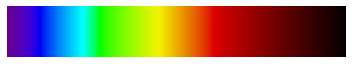

In [59]:
# Spectre du Soleil

temperature = 5800
n = 1000

fig = plt.figure(figsize=(5,1))
ax = plt.subplot2grid((1,1), (0,0))

wavelength = np.linspace(350e-9, 850e-9, n)
alphas     = planck(wavelength, temperature) / planck(wavelength_max(temperature), temperature)
for wl, alpha in zip(wavelength, alphas):
    color = wavelength_to_rgb(wl*1e9)
    new_color = (color[0]*alpha, color[1]*alpha, color[2]*alpha)
    ax.plot([wl, wl], [0,1], color=new_color)
ax.set_xlim(400e-9,800e-9)
ax.set_ylim(0,1)
plt.axis("off")
mysavefig("sun_spectrum_simple.png")

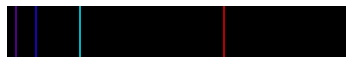

In [60]:
# Spectre de l'hydrogène

lines_H  = [410.17, 434.05, 486.13, 656.28]

fig = plt.figure(figsize=(5,1))
ax = plt.subplot2grid((1,1), (0,0))

wavelength = np.linspace(350, 850, 10)
for wl in wavelength:
    ax.plot([wl, wl], [0,1], color="k", lw=1000)
    
for wl in lines_H:
    color = wavelength_to_rgb(wl)
    ax.plot([wl, wl], [0,1], color=color)
    
ax.set_xlim(400,800)
ax.set_ylim(0,1)
plt.axis("off")
mysavefig("h_spectrum_simple.png")

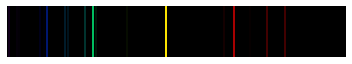

In [28]:
#https://physics.nist.gov/PhysRefData/Handbook/Tables/heliumtable2_a.htm

fig = plt.figure(figsize=(5,1))
ax = plt.subplot2grid((1,1), (0,0))

wavelength = np.linspace(350, 850, 10)
for wl in wavelength:
    ax.plot([wl, wl], [0,1], color="k", lw=1000)

with open("lines_He.txt") as file:
    content = file.readlines()
    wavelength, strength = [], []
    for i, line in enumerate(content):
        if i>0:
            s = float(line[:5])
            w = float(line[14:26])/10
            wavelength.append(w)
            strength.append(s)
        
for wl, s in zip(wavelength, strength):
    color = wavelength_to_rgb(wl)
    alpha = min(1,s/75)
    new_color = (color[0]*alpha, color[1]*alpha, color[2]*alpha)
    ax.plot([wl, wl], [0,1], color=new_color)

ax.set_xlim(400,800)
ax.set_ylim(0,1)
plt.axis("off")
mysavefig("he_spectrum_simple.png")

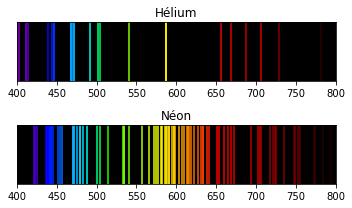

In [29]:
#https://physics.nist.gov/PhysRefData/Handbook/Tables/heliumtable2_a.htm

fig = plt.figure(figsize=(5,3))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

def read_file(filename):
    with open(filename) as file:
        content = file.readlines()
        wavelength, strength = [], []
        for i, line in enumerate(content):
            if i>0:
                s = float(line[:5])
                w = float(line[14:26])/10
                wavelength.append(w)
                strength.append(s)
    return wavelength, strength

def plot_line_spectrum(filename, ax):
    wavelength, strength = read_file(filename)
    for wl, s in zip(wavelength, strength):
        color = wavelength_to_rgb(wl)
        ax.plot([wl, wl], [0,1], color=color)
    ax.set_xlim(400,800)
    ax.set_ylim(0,1)
    ax.set_yticks([])
    ax.set_facecolor("k")
    return

plot_line_spectrum("lines_He.txt",ax1)
ax1.set_title("Hélium")
plot_line_spectrum("lines_Ne.txt",ax2)
ax2.set_title("Néon")
    
mysavefig("he-ne_laser_spectra.png")

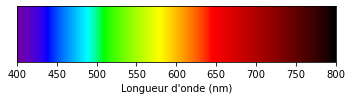

In [145]:
fig = plt.figure(figsize=(5,1.5))
wavelength = np.linspace(400e-9, 800e-9, 1000)
for wl in wavelength:
    color = wavelength_to_rgb(wl*1e9)
    plt.plot([wl*1e9, wl*1e9], [0,1], color=color)
plt.xlim(400,800)
plt.ylim(0,1)
plt.yticks([])
plt.xlabel("Longueur d'onde (nm)")

mysavefig("vis_spectrum.png")

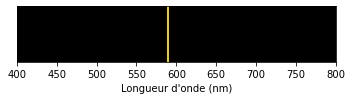

In [32]:
lines_Na = [589.00, 589.59]

def plot_spectrum(lines, emmission=True, title=None):
    fig = plt.figure(figsize=(5,1.5))
    ax = plt.subplot2grid((1,1), (0,0))
    if title is not None:
        ax.set_title(title)
    if emmission:
        ax.set_facecolor("k")
        for wl in lines:
            color = wavelength_to_rgb(wl)
            plt.plot([wl, wl], [0,1], color=color)
    else:
        wavelength = np.linspace(350, 850, 1001)
        for wl in wavelength:
            color = wavelength_to_rgb(wl)
            plt.plot([wl, wl], [0,1], color=color)
        for wl in lines:
            plt.plot([wl, wl], [0,1], color="k")
    plt.xlim(400,800)
    plt.ylim(0,1)
    plt.yticks([])
    plt.xlabel("Longueur d'onde (nm)")

plot_spectrum(lines_Na)
mysavefig("spectrum_Na.png")

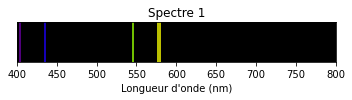

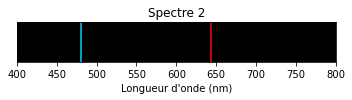

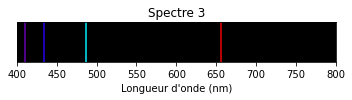

In [144]:
# Simpler version with sextant "database"

lines_Na = [589.00, 589.59]
lines_Hg = [365.02, 404.66, 435.83, 546.07, 576.96, 579.07]
lines_Cd = [479.99, 643.85]
lines_Zn = [468.01, 472.22, 481.05, 636.23]
lines_H  = [410.17, 434.05, 486.13, 656.28]

def plot_spectrum(lines, emmission=True, title=None):
    fig = plt.figure(figsize=(5,1.5))
    ax = plt.subplot2grid((1,1), (0,0))
    if title is not None:
        ax.set_title(title)
    if emmission:
        ax.set_facecolor("k")
        for wl in lines:
            color = wavelength_to_rgb(wl)
            plt.plot([wl, wl], [0,1], color=color)
    else:
        wavelength = np.linspace(350, 850, 1001)
        for wl in wavelength:
            color = wavelength_to_rgb(wl)
            plt.plot([wl, wl], [0,1], color=color)
        for wl in lines:
            plt.plot([wl, wl], [0,1], color="k")
    plt.xlim(400,800)
    plt.ylim(0,1)
    plt.yticks([])
    plt.xlabel("Longueur d'onde (nm)")

#plot_spectrum(lines_Na, title="Sodium (Na)")
#plot_spectrum(lines_Hg, title="Mercure (Hg)")
plot_spectrum(lines_Hg, title="Spectre 1")
mysavefig("spectrum_Hg_anon.png")
#plot_spectrum(lines_Cd, title="Cadmium (Cd)")
plot_spectrum(lines_Cd, title="Spectre 2")
mysavefig("spectrum_Cd_anon.png")
#plot_spectrum(lines_Zn, title="Zinc (Zn)")
#mysavefig("spectrum_Zn_anon.png")
#plot_spectrum(lines_H, title="Hydrogène (H)")
plot_spectrum(lines_H, title="Spectre 3")
mysavefig("spectrum_H_anon.png")

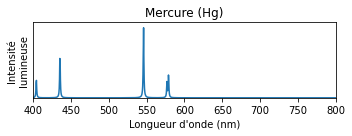

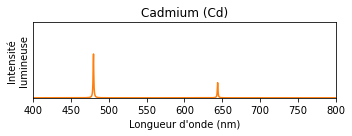

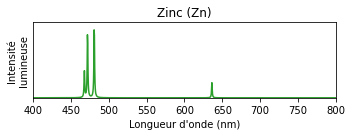

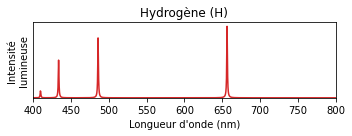

In [146]:
lines_Na = [589.00, 589.59]
scales_Na = [.5, .5]
lines_Hg = [365.02, 404.66, 435.83, 546.07, 576.96, 579.07]
scales_Hg = [.2, .25, .6, .95, .2, .3]
lines_Cd = [479.99, 643.85]
scales_Cd = [.6, .2]
lines_Zn = [468.01, 472.22, 481.05, 636.23]
scales_Zn = [.35, .9, 1, .2]
lines_H  = [410.17, 434.05, 486.13, 656.28]
scales_H = [.1, .5, .8, .95]

def lorentzian(x, x0=0, bw=1, scale=1):
    return scale / (1 + (2 * (x - x0) / bw) ** 2)

def plot_spectrum_curve(lines, scales, title, color):
    fig = plt.figure(figsize=(5,2))
    ax = plt.subplot2grid((1,1), (0,0))
    x = np.linspace(400, 800, 1000)
    y = np.zeros(len(x))
    for line, scale in zip(lines, scales):
        y += lorentzian(x, x0=line, bw=1, scale=scale)
    ax.plot(x, y, color=color)
    ax.set_xlim(400,800)
    ax.set_ylim(0,1)
    ax.set_yticks([])
    ax.set_xlabel("Longueur d'onde (nm)")
    ax.set_ylabel("Intensité\nlumineuse")
    ax.set_title(title)
    
plot_spectrum_curve(lines_Hg, scales_Hg, "Mercure (Hg)", "C0")
mysavefig("spectrum_curve_Hg.png")
plot_spectrum_curve(lines_Cd, scales_Cd, "Cadmium (Cd)", "C1")
mysavefig("spectrum_curve_Cd.png")
plot_spectrum_curve(lines_Zn, scales_Zn, "Zinc (Zn)", "C2")
mysavefig("spectrum_curve_Zn.png")
plot_spectrum_curve(lines_H, scales_H, "Hydrogène (H)", "C3")
mysavefig("spectrum_curve_H.png")



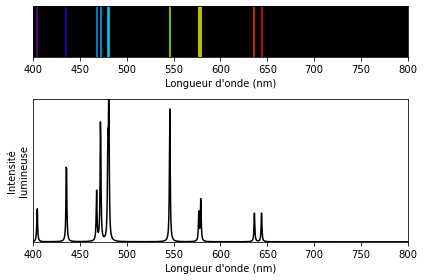

In [199]:
lines = lines_Hg + lines_Cd + lines_Zn
scales = scales_Hg + scales_Cd + scales_Zn

fig = plt.figure(figsize=(6,4))
sps = (3,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0), rowspan=2)

ax1.set_facecolor("k")
for wl in lines:
    color = wavelength_to_rgb(wl)
    ax1.plot([wl, wl], [0,1], color=color)

x = np.linspace(400, 800, 1000)
y = np.zeros(len(x))
for line, scale in zip(lines, scales):
    y += lorentzian(x, x0=line, bw=1, scale=scale)

for wl, amp in zip(x, y):
    color = wavelength_to_rgb(wl)
    #ax2.plot([wl, wl], [0,amp], color=color)
ax2.plot(x, y, color="k")

for ax in [ax1, ax2]:
    ax.set_xlim(400,800)
    ax.set_ylim(0,1)
    ax.set_yticks([])
    ax.set_xlabel("Longueur d'onde (nm)")
ax2.set_ylabel("Intensité\nlumineuse")

mysavefig("spectrum_lines_and_curve.png")

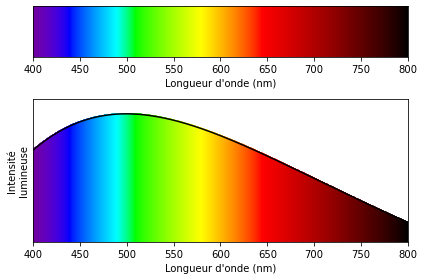

In [17]:
fig = plt.figure(figsize=(6,4))
sps = (3,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0), rowspan=2)

wavelength = np.linspace(400, 800, 1000)

for wl in wavelength:
    color = wavelength_to_rgb(wl)
    ax1.plot([wl, wl], [0,1], color=color)
    

x = np.linspace(400, 800, 1000)
y = planck(x*1e-9, 5800)

for wl, amp in zip(x, y):
    color = wavelength_to_rgb(wl)
    ax2.plot([wl, wl], [0,amp], color=color)
ax2.plot(x, y, color="k")

for ax in [ax1, ax2]:
    ax.set_xlim(400,800)
    ax.set_yticks([])
    ax.set_xlabel("Longueur d'onde (nm)")
ax2.set_ylabel("Intensité\nlumineuse")
ax1.set_ylim(0,1)
ax2.set_ylim(.9*min(y), 1.05*max(y))

mysavefig("spectrum_continnum_and_curve.png")

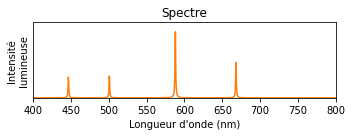

In [149]:
# based on ex 19 page 236
lines_He = [447, 501, 588, 668]
scales_He = [.3, .3, 1, .5]

plot_spectrum_curve(lines_He, scales_He, "Spectre", "C1")
mysavefig("spectrum_curve_He.png")

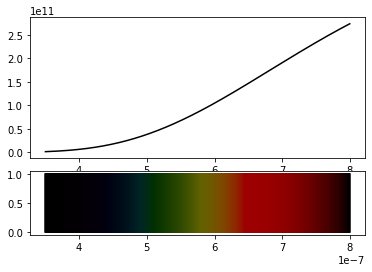

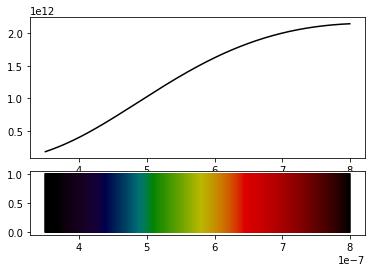

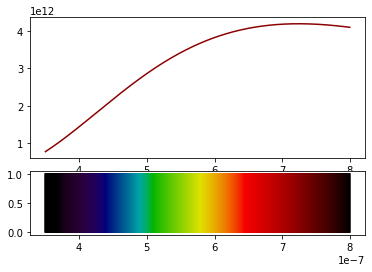

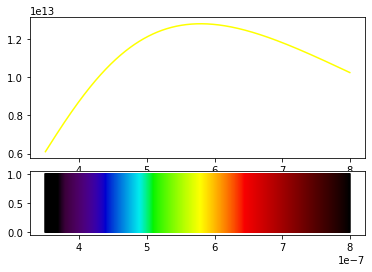

In [221]:
n = 1000
for temperature in [2500, 3500,4000, 5000]:
    fig = plt.figure(figsize=(6,4))
    sps = (3,1)
    ax1 = plt.subplot2grid(sps, (0,0), rowspan=2)
    ax2 = plt.subplot2grid(sps, (2,0), rowspan=1)

    wavelength = np.linspace(350e-9, 800e-9, n)
    #wavelength = np.linspace(10e-9, 2000e-9, n)
    wavelengthmax = wavelength_max(temperature)
    if wavelengthmax > 750e-9:
        norm = planck(750e-9, temperature)
    elif wavelengthmax < 380e-9:
        norm = planck(380e-9, temperature)
    else:
        norm = planck(wavelengthmax, temperature)
    alphas     = planck(wavelength, temperature) / planck(wavelength_max(temperature), temperature)
    alphas     = planck(wavelength, temperature) / planck(720e-9, temperature).max()
    alphas     = planck(wavelength, temperature) / norm
    for wl, alpha in zip(wavelength, alphas):
        color = wavelength_to_rgb(wl*1e9)
        new_color = (color[0]*alpha, color[1]*alpha, color[2]*alpha)
        ax2.plot([wl, wl], [0,1], color=new_color)
    color = wavelength_to_rgb(wavelength_max(temperature)*1e9)
    ax1.plot(wavelength, planck(wavelength, temperature), color=color)

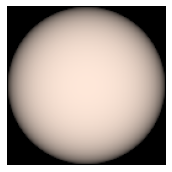

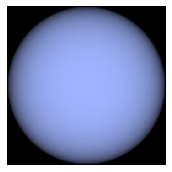

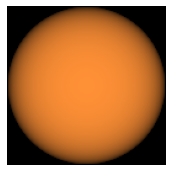

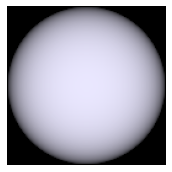

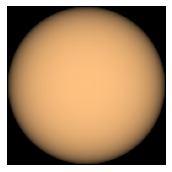

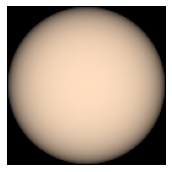

In [8]:
sun              = {"name":"sun", "name_fr":"Soleil", "T":5770, "size":1}
rigel            = {"name":"rigel", "name_fr":"Rigel", "T":10000, "size":78.9}
proxima_centauri = {"name":"proxima_centauri", "name_fr":"Proxima du Centaure", "T":3050, "size":0.1542}
arcturus         = {"name":"arcturus", "name_fr":"Arcturus", "T":4300, "size":25.4}
altair           = {"name":"altair", "name_fr":"Altaïr", "T":6900, "size":2}
tau_ceti         = {"name":"tau_ceti", "name_fr":"Tau Ceti", "T":5344, "size":0.816}
vega             = {"name":"vega", "name_fr":"Véga", "T":9600, "size":2.5}
aldebaran        = {"name":"aldebaran", "name_fr":"Aldébaran", "T":3910, "size":45.1}

stars = [sun, rigel, proxima_centauri, altair, arcturus, tau_ceti]

for star in stars:
    fig = plt.figure(figsize=(2.5,2.5))
    ax = plt.subplot2grid((1,1), (0,0))
    plt.axis('off')
    im = star_image(star["T"])
    ax.imshow(im)
    #ax.set_title(star["name_fr"])
    mysavefig("star_"+star["name"]+".png")

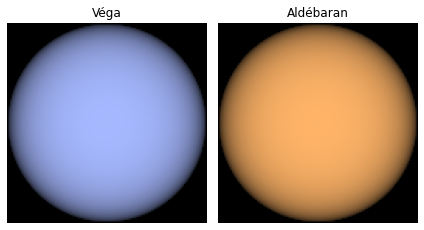

In [10]:
stars = [vega, aldebaran]

fig = plt.figure(figsize=(6,4))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
plt.axis('off')
ax2 = plt.subplot2grid(sps, (0,1))
plt.axis('off')

for ax, star in zip([ax1,ax2], [vega,aldebaran]):
    im = star_image(star["T"])
    ax.imshow(im)
    ax.set_title(star["name_fr"])
mysavefig("two_stars.png")

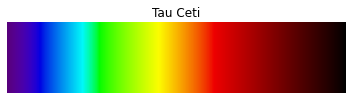

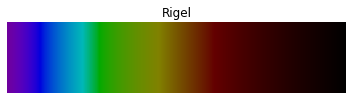

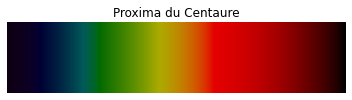

In [124]:
stars = [tau_ceti, rigel, proxima_centauri]

for star in stars:
    temperature = star["T"]
    fig = plt.figure(figsize=(5,1.5))
    ax = plt.subplot2grid((1,1), (0,0))
    wavelength = np.linspace(400e-9, 850e-9, 1000)
    wavelengthmax = wavelength_max(temperature)
    if wavelengthmax > 680e-9:
        norm = planck(680e-9, temperature)
    elif wavelengthmax < 400e-9:
        norm = planck(400e-9, temperature)
    else:
        norm = planck(wavelengthmax, temperature)
    alphas     = planck(wavelength, temperature) / norm
    for wl, alpha in zip(wavelength, alphas):
        color = wavelength_to_rgb(wl*1e9)
        new_color = (color[0]*alpha, color[1]*alpha, color[2]*alpha)
        ax.plot([wl*1e9, wl*1e9], [0,1], color=new_color)
    ax.set_xlim(400,800)
    ax.set_ylim(0,1)
    ax.set_title(star["name_fr"])
    ax.axis("off")
    mysavefig("spectrum_star_"+star["name"]+".png")

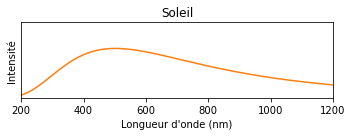

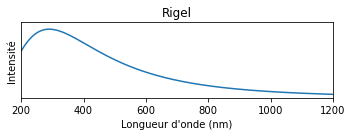

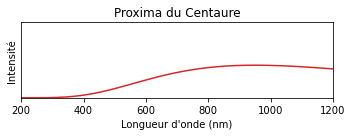

In [111]:
stars = [sun, rigel, proxima_centauri]

wavelength = np.linspace(200e-9, 1200e-9, 1000)

for star in stars:
    fig = plt.figure(figsize=(5, 2))
    ax = plt.subplot2grid((1,1), (0,0))
    temperature = star["T"]

    if star["name"] == "sun":
        color = "C1"
        ax.set_ylim(0, 4e13)
    elif star["name"] == "rigel":
        color = "C0"
        ax.set_ylim(0, 4.5e14)
    elif star["name"] == "proxima_centauri":
        color = "C3"
        ax.set_ylim(0, 2.5e12)
    ax.plot(wavelength*1e9, planck(wavelength, temperature), color=color)
    ax.set_xlim(wavelength.min()*1e9, wavelength.max()*1e9)
    ax.set_yticks([])
    ax.set_xlabel("Longueur d'onde (nm)")
    ax.set_ylabel("Intensité")
    ax.set_title(star["name_fr"])
    mysavefig("spectrum_star_curve_"+star["name"]+".png")

1.159108782e-06


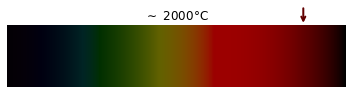

In [55]:
temperature = 2500

fig = plt.figure(figsize=(5,1.5))
ax = plt.subplot2grid((1,1), (0,0))
wavelength = np.linspace(350e-9, 850e-9, 1000)
wavelengthmax = wavelength_max(temperature)
if wavelengthmax > 750e-9:
    norm = planck(750e-9, temperature)
elif wavelengthmax < 380e-9:
    norm = planck(380e-9, temperature)
else:
    norm = planck(wavelengthmax, temperature)
alphas     = planck(wavelength, temperature) / norm
for wl, alpha in zip(wavelength, alphas):
    color = wavelength_to_rgb(wl*1e9)
    new_color = (color[0]*alpha, color[1]*alpha, color[2]*alpha)
    plt.plot([wl*1e9, wl*1e9], [0,1], color=new_color)

plt.xlim(400,800)
plt.ylim(0,1)
plt.axis("off")
plt.title(r"$\sim$ 2000°C")
ax.annotate("",
            xy=(750, 1), xycoords='data',
            xytext=(750, 1.3), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                            color=wavelength_to_rgb(750), lw=2),
           )
print(wavelengthmax)

mysavefig("spectrum_black_body_temp"+str(temperature)+"K.png")

7.2444298875e-07


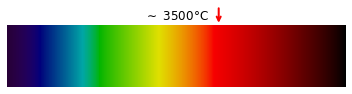

In [56]:
temperature = 4000

fig = plt.figure(figsize=(5,1.5))
ax = plt.subplot2grid((1,1), (0,0))
wavelength = np.linspace(350e-9, 850e-9, 1000)
wavelengthmax = wavelength_max(temperature)
if wavelengthmax > 750e-9:
    norm = planck(750e-9, temperature)
elif wavelengthmax < 380e-9:
    norm = planck(380e-9, temperature)
else:
    norm = planck(wavelengthmax, temperature)
alphas     = planck(wavelength, temperature) / norm
for wl, alpha in zip(wavelength, alphas):
    color = wavelength_to_rgb(wl*1e9)
    new_color = (color[0]*alpha, color[1]*alpha, color[2]*alpha)
    plt.plot([wl*1e9, wl*1e9], [0,1], color=new_color)

plt.xlim(400,800)
plt.ylim(0,1)
plt.axis("off")
plt.title(r"$\sim$ 3500°C")
ax.annotate("",
            xy=(650, 1), xycoords='data',
            xytext=(650, 1.3), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                            color=wavelength_to_rgb(650), lw=2),
           )
print(wavelengthmax)

mysavefig("spectrum_black_body_temp"+str(temperature)+"K.png")

9.65923985e-07
5.79554391e-07
2.897771955e-07


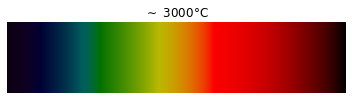

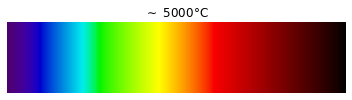

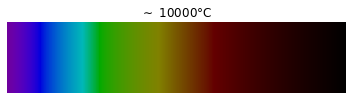

In [125]:
for temperature in [3000, 5000, 10000]:
    fig = plt.figure(figsize=(5,1.5))
    ax = plt.subplot2grid((1,1), (0,0))
    wavelength = np.linspace(350e-9, 850e-9, 1000)
    wavelengthmax = wavelength_max(temperature)
    if wavelengthmax > 650e-9:
        norm = planck(650e-9, temperature)
    elif wavelengthmax < 400e-9:
        norm = planck(400e-9, temperature)
    else:
        norm = planck(wavelengthmax, temperature)
    alphas     = planck(wavelength, temperature) / norm
    for wl, alpha in zip(wavelength, alphas):
        color = wavelength_to_rgb(wl*1e9)
        new_color = (color[0]*alpha, color[1]*alpha, color[2]*alpha)
        plt.plot([wl*1e9, wl*1e9], [0,1], color=new_color)

    plt.xlim(400,800)
    plt.ylim(0,1)
    plt.axis("off")
    plt.title(r"$\sim$ "+str(temperature)+"°C")
    print(wavelengthmax)

    mysavefig("spectrum_black_body_temp"+str(temperature)+"K.png")

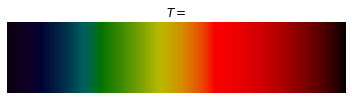

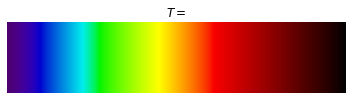

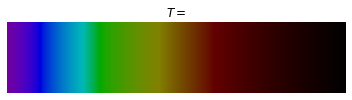

In [132]:
for temperature in [3000, 5000, 10000]:
    fig = plt.figure(figsize=(5,1.5))
    ax = plt.subplot2grid((1,1), (0,0))
    wavelength = np.linspace(350e-9, 850e-9, 1000)
    wavelengthmax = wavelength_max(temperature)
    if wavelengthmax > 650e-9:
        norm = planck(650e-9, temperature)
    elif wavelengthmax < 400e-9:
        norm = planck(400e-9, temperature)
    else:
        norm = planck(wavelengthmax, temperature)
    alphas     = planck(wavelength, temperature) / norm
    for wl, alpha in zip(wavelength, alphas):
        color = wavelength_to_rgb(wl*1e9)
        new_color = (color[0]*alpha, color[1]*alpha, color[2]*alpha)
        plt.plot([wl*1e9, wl*1e9], [0,1], color=new_color)

    plt.xlim(400,800)
    plt.ylim(0,1)
    plt.axis("off")
    
    plt.title(r"$T =$")


    mysavefig("spectrum_black_body_temp"+str(temperature)+"K_notemp.png")

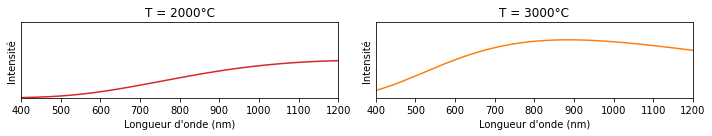

In [79]:
fig = plt.figure(figsize=(10, 2))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))

wavelength = np.linspace(400e-9, 1200e-9, 1000)

for ax, temperature in zip([ax1, ax2],[2273, 3273]):
    if ax==ax1:
        color="C3"
    else:
        color="C1"
    ax.plot(wavelength*1e9, planck(wavelength, temperature), color=color)
    ax.set_xlim(wavelength.min()*1e9, wavelength.max()*1e9)
    ax.set_yticks([])
    ax.set_xlabel("Longueur d'onde (nm)")
    ax.set_ylabel("Intensité")
    ax.set_title("T = "+str(temperature-273)+"°C")
ax1.set_ylim(0, 5e11)
ax2.set_ylim(0, 2e12)
mysavefig("spectrum_black_body_curve"+str(temperature)+"K.png")

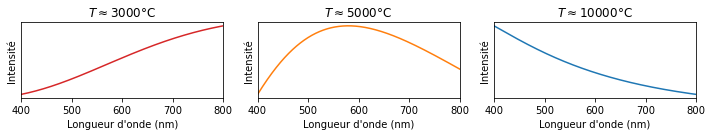

In [19]:
fig = plt.figure(figsize=(10, 2))
sps = (1,3)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))
ax3 = plt.subplot2grid(sps, (0,2))
wavelength = np.linspace(400e-9, 800e-9, 1000)

for ax, temperature in zip([ax1, ax2, ax3],[3000, 5000, 10000]):
    if ax==ax1:
        color="C3"
    elif ax==ax2:
        color="C1"
    else:
        color="C0"
    ax.plot(wavelength*1e9, planck(wavelength, temperature), color=color)
    ax.set_xlim(wavelength.min()*1e9, wavelength.max()*1e9)
    ax.set_yticks([])
    ax.set_xlabel("Longueur d'onde (nm)")
    ax.set_ylabel("Intensité")
    ax.set_title(r"$T \approx $"+str(temperature)+"°C")

mysavefig("spectrum_black_body_curve"+str(temperature)+"K.png", dpi=500)